In [4]:
from qsextra import ExcitonicSystem
from qsextra.qcomo import qevolve, clevolve
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

The ExcitonicSystem object accounts for the excitonic degrees of freedom. The Hamiltonian is
$$
\hat{H} = \hat{H}^\text{e} = - \sum_{i=1}^N \frac{\epsilon_i}{2} \hat{\sigma}_i^z + \sum_{i=1}^{N-1} \sum_{j>i} J_{ij} \left( \hat{\sigma}_i^+\hat{\sigma}_j^- + \hat{\sigma}_i^- \hat{\sigma}_j^+ \right)
$$

In [5]:
epsilon = [1, 2, 3, 4]
J = toeplitz([0., 1., 0., 1.])
print(J)

esys = ExcitonicSystem(energies=epsilon, couplings=J)

[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]


In [6]:
esys.get_e_Hamiltonian()
print(esys.get_e_Hamiltonian())

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -4.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  2.  0.  0.  0.]
 [ 0.  0.  0. 

Set the state of the system with `set_state`. Possible options:
- `state_type = 'state'`: It requires a list of coefficients for the $2^{N}$ states that compose the excitonic Hilbert space. A standard binary ordering and local basis set are intended. Example: for $N=3$, `state = [0., 0., 0., 1.+0.j, 0., 0., 0., 0.] := |011>` denotes a double-excited state with both chromophore 0 and 1 excited. 
- `state_type = 'delocalized excitation'`: It takes a list of $N$ (complex) coefficients that describe the superposition of single excitation states. Example: for $N=3$, `state = [c_001, c_010, c_100] = [0., 1./sqrt(2), 1./sqrt(2)] := 1/sqrt(2) |010> + 1/sqrt(2) |100>`.
- `state_type = 'localized excitation'`: It takes an integer that denotes the excited chromophore. Chromophores are numbered from $0$ to $N-1$. Example: for $N=3$, `state = 1 := |010>`.
- `state_type = 'ground'`: It does not require any input for `state`. The system is in the global ground state.

In [7]:
esys.set_state(state_type='delocalized excitation',
               state=[1/np.sqrt(2), 1/np.sqrt(2), 0, 0])

/home/juu8242/opt/anaconda3/envs/qsextra/lib/python3.11/site-packages/qsextra/system/system.py:256: UserWarning: Coefficients have been normalized.
  warnings.warn('Coefficients have been normalized.')


In [8]:
esys.get_e_state()

Quantum object: dims=[[2, 2, 2, 2], [1, 1, 1, 1]], shape=(16, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

In [9]:
esys.todict()

{'class': qsextra.system.system.ExcitonicSystem,
 'system_size': 4,
 'e_el': [1, 2, 3, 4],
 'dipole_moments': [1.0, 1.0, 1.0, 1.0],
 'coupl_el': [[0.0, 1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0, 0.0],
  [0.0, 1.0, 0.0, 1.0],
  [1.0, 0.0, 1.0, 0.0]],
 'validity': True,
 'state_type': 'delocalized excitation',
 'state': [(0.7071067811865476+0j), (0.7071067811865476+0j), 0j, 0j]}

In [10]:
dt = 0.01
time = np.arange(0, 20, dt*20)
shots = 16000

# Unitary dynamics

The dynamics is driven by the Schrödinger equation
$$
\frac{d \psi (t)}{dt} =
-i \hat{H} \psi (t)
$$

Quantum algorithm (Qiskit Aer Simulation)

In [11]:
results = qevolve(esys, time, shots=shots, dt=dt)

P = np.zeros((len(epsilon), time.size))
counts = results.get_counts()
for nc, c in enumerate(counts):
    for i in range(len(epsilon)):
        try:
            P[i, nc] = c['{:b}'.format(1 << i).zfill(len(epsilon))]/shots
        except:
            P[i, nc] = 0

print(P)

Start creating the circuits...
Circuits created...
Start measuring the circuits...
If you only do what you can do, you will never be more than what you are now. [Master Shifu]
[[0.5015    0.4596875 0.3670625 0.2475625 0.1605    0.114375  0.097875
  0.0998125 0.123     0.164875  0.228875  0.2970625 0.338625  0.3438125
  0.3160625 0.283     0.27      0.2964375 0.3340625 0.34875   0.308
  0.253125  0.1903125 0.137     0.1056875 0.093625  0.10325   0.1409375
  0.2058125 0.3166875 0.427625  0.489375  0.4861875 0.4108125 0.300375
  0.1913125 0.124875  0.1030625 0.0990625 0.113375  0.1470625 0.1944375
  0.2685625 0.3305625 0.3539375 0.3280625 0.29075   0.2649375 0.2830625
  0.3155    0.342375  0.3288125 0.2878125 0.2160625 0.151     0.1129375
  0.0984375 0.1021875 0.1238125 0.1758125 0.2725625 0.3908125 0.4785
  0.50025   0.439625  0.3363125 0.23525   0.155     0.109625  0.0981875
  0.0999375 0.1260625 0.1781875 0.241375  0.307375  0.3440625 0.3389375
  0.3069375 0.2696875 0.273     0.2988125

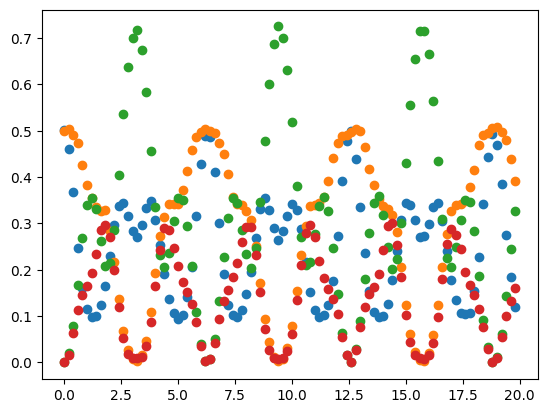

In [12]:
[plt.scatter(time, P[i, :]) for i in range(len(epsilon))]

Classical algorithm (Qutip sevolve)

In [13]:
t_list = np.arange(0, 20, dt)
results_qutip = clevolve(esys, t_list, measure_populations=True)

P_qutip = results_qutip.expect
error = []
for i in range(len(epsilon)):
    error.append(
        np.sqrt(P_qutip[i] * (np.ones_like(P_qutip[i]) - P_qutip[i]) / shots))

We do not wash our pits in the pool of sacred tears. [Master Shifu]


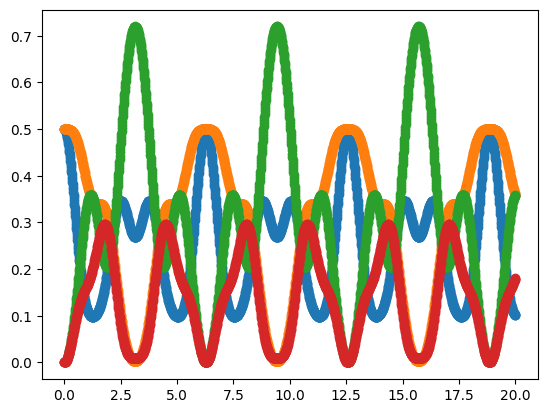

In [14]:
[plt.scatter(t_list, P_qutip[i]) for i in range(len(epsilon))]

Comparison:
- P1

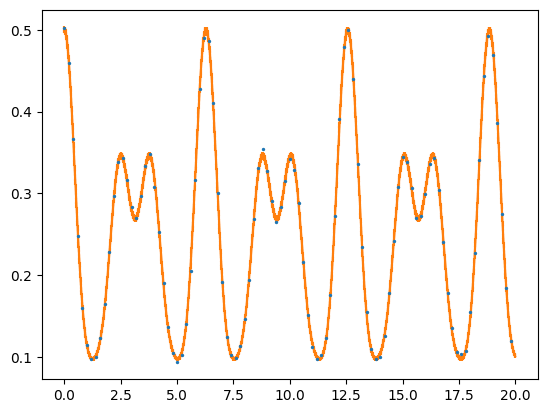

In [15]:
plt.errorbar(t_list, P_qutip[0], yerr=error[0], c='tab:orange', zorder=-1)
plt.scatter(time, P[0, :], s=2, c='tab:blue', zorder=1)

- P2

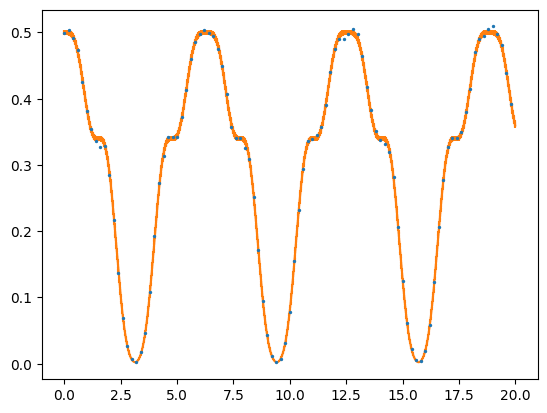

In [16]:
plt.errorbar(t_list, P_qutip[1], yerr=error[1], c='tab:orange', zorder=-1)
plt.scatter(time, P[1, :], s=2, c='tab:blue', zorder=1)

- P3

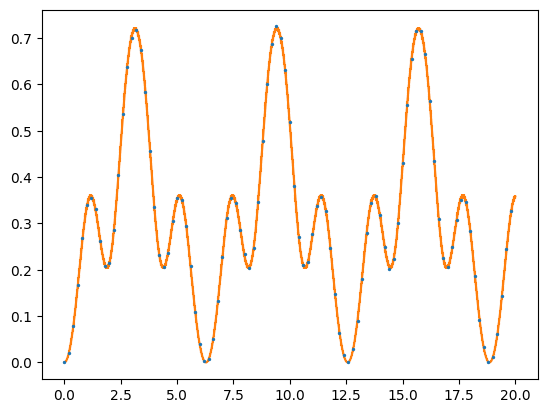

In [17]:
plt.errorbar(t_list, P_qutip[2], yerr=error[2], c='tab:orange', zorder=-1)
plt.scatter(time, P[2, :], s=2, c='tab:blue', zorder=1)

- P4

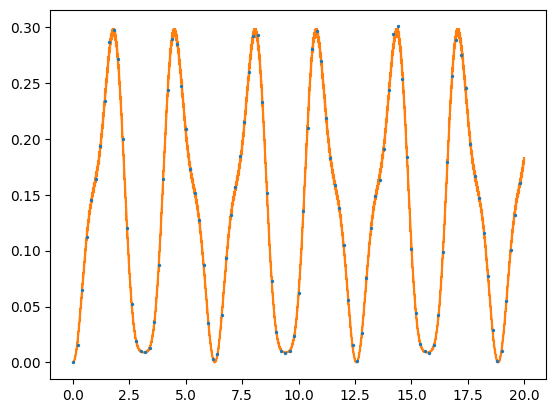

In [18]:
plt.errorbar(t_list, P_qutip[3], yerr=error[3], c='tab:orange', zorder=-1)
plt.scatter(time, P[3, :], s=2, c='tab:blue', zorder=1)

# Dynamics with dephasing environment (Markovian)

The dynamics is driven by the Lindblad-form quantum master equation
$$
\frac{d \rho (t)}{dt} =
-i \left[ \hat{H}, \rho (t) \right] +
\gamma
\sum_{i=1}^N
\left(
\hat{\sigma}_i^z \rho (t) \hat{\sigma}_i^z -
\rho (t)
\right)
$$

In [19]:
gamma = 0.1

Quantum algorithm (Qiskit Aer Simulation). The Lindblad dynamics is implemented with a collision model.

In [ ]:
results = qevolve(esys, time, shots=shots, dt=dt, coll_rates=gamma)

P = np.zeros((len(epsilon), time.size))
counts = results.get_counts()
for nc, c in enumerate(counts):
    for i in range(len(epsilon)):
        try:
            P[i, nc] = c['{:b}'.format(1 << i).zfill(len(epsilon))]/shots
        except:
            P[i, nc] = 0

Start creating the circuits...
Circuits created...
Start measuring the circuits...


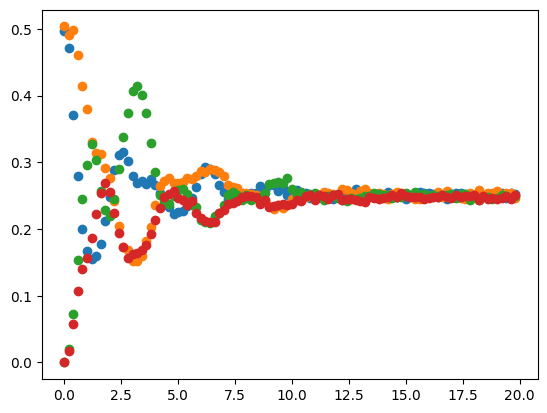

In [18]:
[plt.scatter(time, P[i, :]) for i in range(len(epsilon))]

Classical algorithm (Qutip mevolve)

In [20]:
t_list = np.arange(0, 20, dt)
results = clevolve(esys, t_list, gamma, measure_populations=True)

P_qutip = results.expect
error = []
for i in range(len(epsilon)):
    error.append(
        np.sqrt(P_qutip[i] * (np.ones_like(P_qutip[i]) - P_qutip[i]) / shots))

Your mind is like this water, my friend. When it is agitated, it becomes difficult to see. But if you allow it to settle, the answer becomes clear. [Master Oogway]


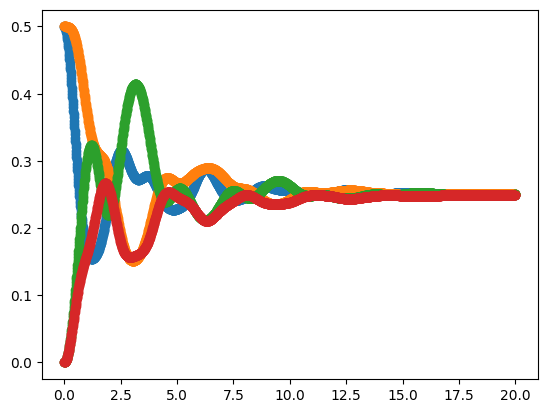

In [21]:
[plt.scatter(t_list, P_qutip[i]) for i in range(len(epsilon))]

Comparison:

- P1

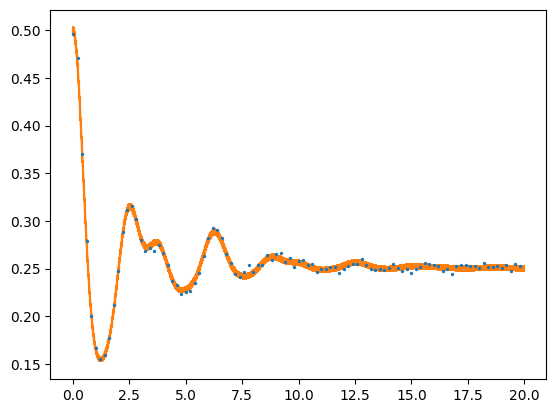

In [22]:
plt.errorbar(t_list, P_qutip[0], yerr=error[0], c='tab:orange', zorder=-1)
plt.scatter(time, P[0, :], s=2, c='tab:blue', zorder=1)

- P2

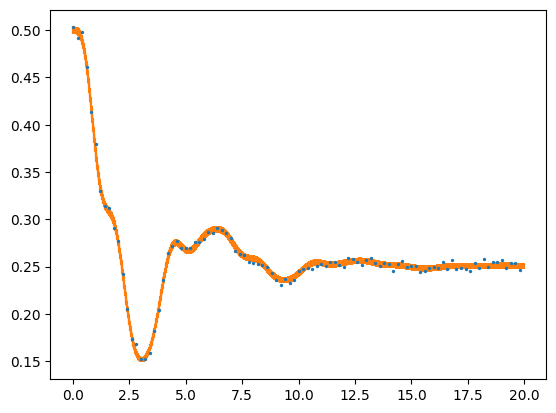

In [23]:
plt.errorbar(t_list, P_qutip[1], yerr=error[1], c='tab:orange', zorder=-1)
plt.scatter(time, P[1, :], s=2, c='tab:blue', zorder=1)

- P3

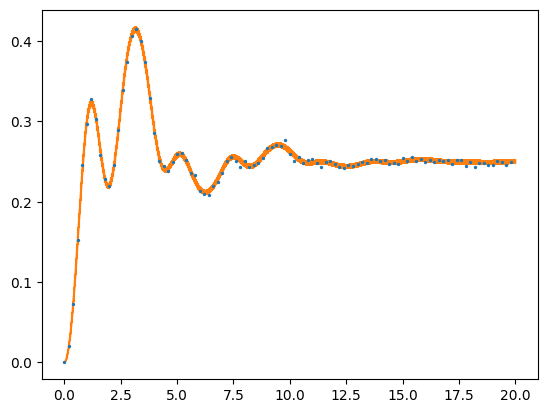

In [24]:
plt.errorbar(t_list, P_qutip[2], yerr=error[2], c='tab:orange', zorder=-1)
plt.scatter(time, P[2, :], s=2, c='tab:blue', zorder=1)

- P4

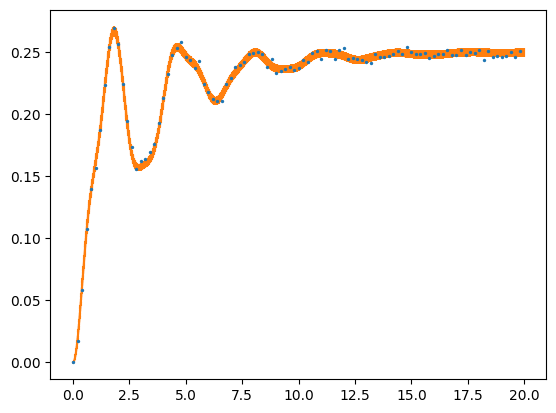

In [25]:
plt.errorbar(t_list, P_qutip[3], yerr=error[3], c='tab:orange', zorder=-1)
plt.scatter(time, P[3, :], s=2, c='tab:blue', zorder=1)